# Démo Time

Nous allons utiliser les données sur les survivants du naufrage du Titanic pour voir la démarche d'analyse exploratoire et de construction d'un modèle prédictif, en utilisant les librairies scientifiques suivantes :  

*  pandas  
*  scikit-learn  
*  matplotlib

Nous avons déjà commencé à voir les 2 dernières, `pandas` est pour sa part un incontournable pour travailler avec des données structurées en tableau.

Pour plus de détails, vous pouvez allez voir ici : https://www.kaggle.com/c/titanic

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
data = pd.read_csv("titanic.csv", sep=',')

VARIABLE DESCRIPTIONS:

    survival Survival
    (0 = No; 1 = Yes)
    pclass Passenger Class
    (1 = 1st; 2 = 2nd; 3 = 3rd)
    name Name
    sex Sex
    age Age
    sibsp Number of Siblings/Spouses Aboard
    parch Number of Parents/Children Aboard
    ticket Ticket Number
    fare Passenger Fare
    cabin Cabin
    embarked Port of Embarkation
    (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
    Pclass is a proxy for socio-economic status (SES)
    1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

    Age is in Years; Fractional if Age less than One (1)
    If the Age is Estimated, it is in the form xx.5

    With respect to the family relation variables (i.e. sibsp and parch)
    some relations were ignored. The following are the definitions used
    for sibsp and parch.

    Sibling: Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
    Spouse: Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
    Parent: Mother or Father of Passenger Aboard Titanic
    Child: Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

    Other family relatives excluded from this study include cousins,
    nephews/nieces, aunts/uncles, and in-laws. Some children travelled
    only with a nanny, therefore parch=0 for them. As well, some
    travelled with very close friends or neighbors in a village, however,
    the definitions do not support such relations.

# Validation des données

La première étape est de valider la qualité des données. On cherche généralement les trous, les anomalies, etc. Ici nous travaillons avec un seul fichier en entrée, mais habituellement il faut recoller plusieurs sources de données. Il faut donc également valider que ce genre d'opérations de *jointure* soient correctes.

In [4]:
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


** 1er point : ** il y a des NaN dans les données

Petit résumé statistique rapide des données numériques

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


** 2ème point :** des valeurs suspectes

* age : seulement 714 valeurs au lieu de 891 comme les autres !
* fare = 0 , voyageurs gratuits ?
   

### Analyse des tarifs

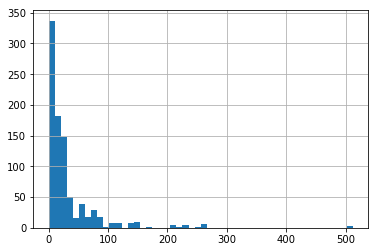

In [6]:
data['Fare'].hist(bins=50)
plt.show()

La majorité des données sont < 100 !  
On va se concentrer sur cette région. Il y a différentes façons de le faire, je vais aller au plus simple et juste contraindre le graphe à une région plus petite

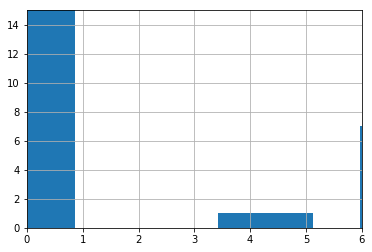

In [7]:
data['Fare'].hist(bins=600)
plt.axis([0,6,0,15])
plt.show()

Il y a un *gap* entre 0 et 5 !

In [8]:
data[data.Fare < 5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S


Les entrées ne montrent aucun signe particulier, donc :

**0 équivaut à une absence de données**

Nous allons marquer ces données comme étant des NaN (Not a Number)

In [9]:
data['Fare'] = data['Fare'].map(lambda x: np.nan if x == 0 else x)

Vérifions le résultat

In [10]:
data[data.Fare < 5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C


In [12]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,876.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.755650
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.936826
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,4.012500
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.925000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.275000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Fare : seulement 876 valeurs  
Age : 714

#### Remplacement des valeurs manquantes
Calcul des Fare moyens par classe !

In [13]:
Pclass_means = data.pivot_table('Fare', index='Pclass', aggfunc='mean')
Pclass_means

Pclass
1    86.148874
2    21.358661
3    13.787875
Name: Fare, dtype: float64

In [14]:
data['Fare'] = data.apply(lambda x: Pclass_means[x["Pclass"]] if pd.isnull(x['Fare']) 
                          else x['Fare'], axis=1)

### Age

La même problématique pour les âges : **données manquantes**.

Version simple : remplacer par âge moyen

In [15]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

Version moins simple : âge moyen par sexe

In [16]:
Age_mean = data.pivot_table('Age', index='Sex', aggfunc='mean')
Age_mean

Sex
female    28.216730
male      30.505824
Name: Age, dtype: float64

On peut envisager des approches plus sophistiquées, par exemple en utilisant des algorithmes de type nearest neighbours, afin de garder une granularité plus fine sur la complétion des données manquantes.

### Cabin

Beaucoup trop de Nan, comme on peut le voir dans le code suivant :

In [17]:
sum(data['Cabin'].isnull())

687

In [18]:
data.drop(['Cabin'], axis=1, inplace=True)

# Analyse de Survie

Représenter graphiquement les données (lorsque c'est possible) permet de se faire rapidement un premier avis.

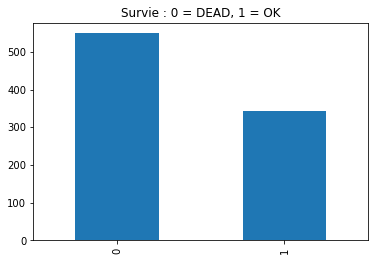

In [19]:
data['Survived'].value_counts().plot(kind='bar')
plt.title('Survie : 0 = DEAD, 1 = OK')
plt.show()

Ici on vérifie principalement si les catégories sont désequilibrées. Dans le cas où une catégorie domine largement l'autre, il faut faire attention dans la construction et la validation des algorithmes de classification, et avoir des traitements particuliers en amont.

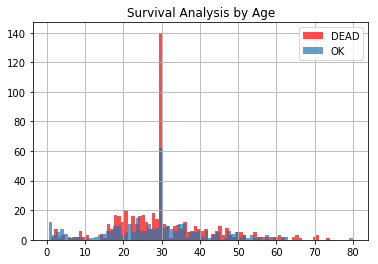

In [20]:
data['Age'][data['Survived']==0].hist(bins=80, alpha = 0.7, color='red') 
data['Age'][data['Survived']==1].hist(bins=80, alpha = 0.7)
plt.title('Survival Analysis by Age')
plt.legend(('DEAD','OK'),loc='best') 
plt.show()

** Pourquoi voit-on un pic à 30 ?**

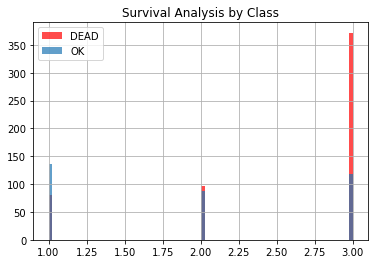

In [22]:
data['Pclass'][data['Survived']==0].hist(bins=80, alpha = 0.7, color='red') 
data['Pclass'][data['Survived']==1].hist(bins=80, alpha = 0.7)
plt.title('Survival Analysis by Class')
plt.legend(('DEAD','OK'),loc='best') 
plt.show()

Plus forte proportion de DEAD en 3ème classe !

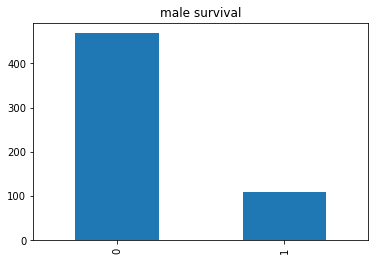

In [23]:
data['Survived'][data['Sex']=='male'].value_counts().plot(kind='bar')
plt.title("male survival")
plt.show()

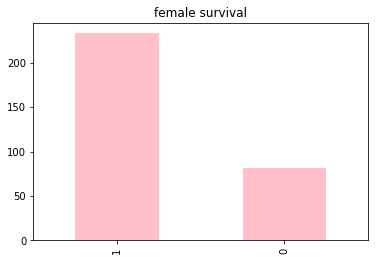

In [24]:
data['Survived'][data['Sex']=='female'].value_counts().plot(kind='bar', color='pink')
plt.title("female survival")
plt.show()

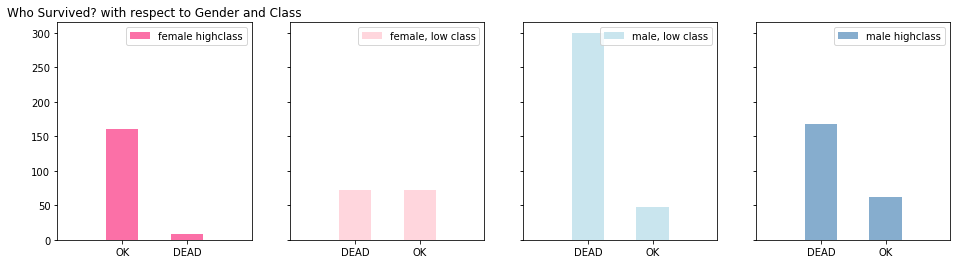

In [25]:
fig = plt.figure(figsize=(16,4))
alpha_level = 0.65

ax1=fig.add_subplot(141)
female_highclass = data['Survived'][data['Sex'] == 'female'][data['Pclass'] != 3].value_counts()
female_highclass.plot(kind='bar', label='female highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["OK", "DEAD"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = data['Survived'][data['Sex'] == 'female'][data['Pclass'] == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["DEAD","OK"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = data['Survived'][data['Sex'] == 'male'][data['Pclass'] == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["DEAD","OK"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = data['Survived'][data['Sex'] == 'male'][data['Pclass'] != 3].value_counts()
male_highclass.plot(kind='bar', label='male highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["DEAD","OK"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

plt.show()

# Mise en place de la classification

On charge la classe RandomForestClassifier depuis le sous-module ensemble de la librairie scikit-learn, ainsi qu'une fonction qui se chargera pour nous de séparer les données en train et test

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

L'algorithme choisi ne fonctionne qu'avec des entrées numériques. Il nous reste donc quelques transformations sur les variables catégoriques. L'approche choisie n'est pas la plus *propre* théoriquement, pourquoi selon vous ? Dans l'idéal il faudrait passer par la fonction [LabelEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) de scikit-learn.


In [26]:
dataML = data
dataML['Sex'] = dataML['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [29]:
if len(dataML.Embarked[ dataML.Embarked.isnull() ]) > 0:
    dataML.Embarked[dataML.Embarked.isnull()] = dataML.Embarked.dropna().mode().values
    
Ports = list(enumerate(np.unique(dataML['Embarked'])))
Ports_dict = { name : i for i, name in Ports } 
dataML.Embarked = dataML.Embarked.map( lambda x: Ports_dict[x]).astype(int) 

On se débarasse également de colonnes qui ne semblent pas pertinentes pour la classification.

In [30]:
column_drop = ['Name', 'Ticket', 'Cabin', 'PassengerId']
for column in column_drop:
    if column in dataML.columns:
        dataML.drop(column, axis=1, inplace=True) 

On peut voir qu'il ne reste que des données numériques pertinentes

In [31]:
dataML.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


Préparation des données pour apprentissage et tests : validation de la pertinence de la prédiction

In [32]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = dataML[features_columns].values
y = dataML['Survived'].values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Training

On instancie notre foret avec un seul arbre !

In [36]:
forest = RandomForestClassifier(n_estimators=1)

In [37]:
forest = forest.fit(X_train, y_train)

## Testing

In [38]:
y_predicted = forest.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [40]:
confusion_matrix(y_test, y_predicted)

array([[111,  33],
       [ 32,  47]])

In [41]:
accuracy_score(y_test, y_predicted)

0.70852017937219736

Nous allons varier le nombre d'arbres dans la foret et voir comment le score évolue

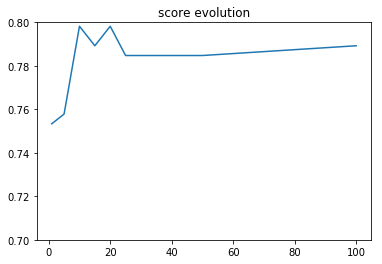

In [75]:
scores = []
Ns = [1,5,10,15,20,25,50,100]
for n in Ns:
    forest = RandomForestClassifier(n_estimators=n)
    forest = forest.fit(X_train, y_train)
    y_predicted = forest.predict(X_test) 
    scores.append(accuracy_score(y_test, y_predicted))

plt.plot(Ns, scores)
plt.title('score evolution')
plt.ylim([0.7, 0.8])
plt.show()

Nous sommes ici entrain de fixer à la main l'hyperparamètre du modèle. En toute rigueur, notre cross-validation doit utiliser 3 sets différents :

1. *train* : apprentissage (fit algorithmique)
2. *validation* : pour la sélection des hyperparamètres
3. *test* : le modèle ne doit pas être modifié en utilisant ce set de quelque manière que ce soit, pour que la valeur du score ait un sens en terme de généralisation du modèle

## Features importance

Un des intérêts majeurs des random forests est de permettre de déterminer l'importance des features

In [76]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

In [79]:
print(features_columns)

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


In [78]:
sorted_features = np.array(features_columns)[indices]
print(sorted_features)

['Sex' 'Age' 'Fare' 'Pclass' 'SibSp' 'Parch' 'Embarked']


In [80]:
for f, w in zip(sorted_features, importances[indices]):
    print(f,'\t', w)

Sex 	 0.286972970757
Age 	 0.265982448493
Fare 	 0.245664651881
Pclass 	 0.0724749727706
SibSp 	 0.0483113689288
Parch 	 0.0432868863932
Embarked 	 0.037306700776
